In [22]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [64]:
def processing_data(file):
    dfrelust = pd.DataFrame()
    no_use_colums = ['PassengerId', 'Name', 'Ticket','Cabin']
    file = file.drop(no_use_colums, axis = 1)
    #file['Sex'] = file['Sex'].map(lambda x: 1 if x == 'male' else 0) # 对性别进行修改
    file['Age'] = file['Age'].fillna(file['Age'].mean()) # 对年龄进行了修改
    #file['Age'] = file['Age'].map(lambda x :x if x > 1 else 1)  
    file['Age'] = file['Age'].map(lambda x : (x - np.min(file['Age'])) / (np.max(file['Age'])  - np.min(file['Age']) ))
    file['Fare'] = file['Fare'].map(lambda x : (x - np.min(file['Fare'])) / (np.max(file['Fare'])  - np.min(file['Fare']) ))
    dfrelust = pd.concat([file['Pclass'], pd.get_dummies(file['Sex']), file['Age'], file['SibSp'], file['Parch'], file['Fare'],pd.get_dummies(file['Embarked']),file['Survived']],axis = 1)
    return dfrelust

In [65]:
def read_csv_1(filepath):
    file = pd.read_csv(filepath)
    dfrelut = processing_data(file)
    return dfrelut
file = read_csv_1('../data/train.csv')

In [66]:
file

,Pclass,female,male,Age,SibSp,Parch,Fare,C,Q,S,Survived
0,3,0,1,0.271174,1,0,0.014151,0,0,1,0
1,1,1,0,0.472229,1,0,0.139136,1,0,0,1
2,3,1,0,0.321438,0,0,0.015469,0,0,1,1
3,1,1,0,0.434531,1,0,0.103644,0,0,1,1
4,3,0,1,0.434531,0,0,0.015713,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,1,0.334004,0,0,0.025374,0,0,1,0
887,1,1,0,0.233476,0,0,0.058556,0,0,1,1
888,3,1,0,0.367921,1,2,0.045771,0,0,1,0
889,1,0,1,0.321438,0,0,0.058556,1,0,0,1


In [67]:
file = np.array(file, dtype = np.float32)
file

array([[3., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [3., 1., 0., ..., 0., 1., 1.],
       ...,
       [3., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [3., 0., 1., ..., 1., 0., 0.]], dtype=float32)

In [68]:
file[:, :-1]

array([[3., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [3., 1., 0., ..., 0., 0., 1.],
       ...,
       [3., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [3., 0., 1., ..., 0., 1., 0.]], dtype=float32)

In [69]:
class TitanicDataSet(Dataset):
    def __init__(self, filepath):
        xy = read_csv_1(filepath)
        self.len = len(xy)
        xy = np.array(xy)
        self.x_data = torch.tensor(xy[:, :-1], dtype = torch.float32)
        self.y_data = torch.tensor(xy[:, [-1]], dtype = torch.float32)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [70]:
dataset = TitanicDataSet('../data/train.csv')

In [71]:
train_loader = DataLoader(dataset = dataset, batch_size = 32, shuffle = True, num_workers = 0)

In [72]:
for f, l in dataset:
    print('特征为:{},所对应的标签为:{}'.format(f.data, l))

特征为:tensor([3.0000, 0.0000, 1.0000, 0.2712, 1.0000, 0.0000, 0.0142, 0.0000, 0.0000,
        1.0000]),所对应的标签为:tensor([0.])
特征为:tensor([1.0000, 1.0000, 0.0000, 0.4722, 1.0000, 0.0000, 0.1391, 1.0000, 0.0000,
        0.0000]),所对应的标签为:tensor([1.])
特征为:tensor([3.0000, 1.0000, 0.0000, 0.3214, 0.0000, 0.0000, 0.0155, 0.0000, 0.0000,
        1.0000]),所对应的标签为:tensor([1.])
特征为:tensor([1.0000, 1.0000, 0.0000, 0.4345, 1.0000, 0.0000, 0.1036, 0.0000, 0.0000,
        1.0000]),所对应的标签为:tensor([1.])
特征为:tensor([3.0000, 0.0000, 1.0000, 0.4345, 0.0000, 0.0000, 0.0157, 0.0000, 0.0000,
        1.0000]),所对应的标签为:tensor([0.])
特征为:tensor([3.0000, 0.0000, 1.0000, 0.3679, 0.0000, 0.0000, 0.0165, 0.0000, 1.0000,
        0.0000]),所对应的标签为:tensor([0.])
特征为:tensor([1.0000, 0.0000, 1.0000, 0.6733, 0.0000, 0.0000, 0.1012, 0.0000, 0.0000,
        1.0000]),所对应的标签为:tensor([0.])
特征为:tensor([3.0000, 0.0000, 1.0000, 0.0199, 3.0000, 1.0000, 0.0411, 0.0000, 0.0000,
        1.0000]),所对应的标签为:tensor([0.])
特征为:tensor([3.0000, 1.00

In [73]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(10, 8)
        self.linear2 = nn.Linear(8, 6)
        self.linear3 = nn.Linear(6, 4)
        self.linear4 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        x = self.sigmoid(self.linear4(x))
        return x
model = Model()

In [74]:
model

Model(
  (linear1): Linear(in_features=10, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=6, bias=True)
  (linear3): Linear(in_features=6, out_features=4, bias=True)
  (linear4): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [75]:
criterion = nn.BCELoss(size_average = False) # size_average = False
criterion

D:\anconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


BCELoss()

In [76]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [77]:
epoch_loss_dict =  {}
for epoch in range(2500):
    epoch_loss_dict[epoch] = []
    for i, date in enumerate(train_loader):
        input, labels = date
        y_pred = model(input)
        loss = criterion(y_pred, labels)
        #loss_list.append(loss)
        epoch_loss_dict[epoch].append(loss)
        print('Epoch = ', epoch, 'Loss = ', loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #epoch_list.append(epoch)
print('结束!')

Epoch =  0 Loss =  21.923080444335938
Epoch =  0 Loss =  21.557716369628906
Epoch =  0 Loss =  21.08223533630371
Epoch =  0 Loss =  21.630870819091797
Epoch =  0 Loss =  20.403566360473633
Epoch =  0 Loss =  22.004920959472656
Epoch =  0 Loss =  21.2353515625
Epoch =  0 Loss =  20.428720474243164
Epoch =  0 Loss =  24.32279396057129
Epoch =  0 Loss =  21.62230110168457
Epoch =  0 Loss =  21.287799835205078
Epoch =  0 Loss =  20.89461898803711
Epoch =  0 Loss =  22.010644912719727
Epoch =  0 Loss =  20.85361671447754
Epoch =  0 Loss =  20.779268264770508
Epoch =  0 Loss =  20.7276554107666
Epoch =  0 Loss =  23.078853607177734
Epoch =  0 Loss =  20.392454147338867
Epoch =  0 Loss =  22.09006118774414
Epoch =  0 Loss =  19.904220581054688
Epoch =  0 Loss =  23.155858993530273
Epoch =  0 Loss =  19.08099365234375
Epoch =  0 Loss =  22.7579288482666
Epoch =  0 Loss =  21.172658920288086
Epoch =  0 Loss =  23.54644775390625
Epoch =  0 Loss =  21.606544494628906
Epoch =  0 Loss =  21.2264175

In [78]:
loss_list = []
epoch_list = []
for key, value in epoch_loss_dict.items():
    epoch_list.append(key)
    loss_list.append(float(np.sum(value)) / len(value))

In [79]:
len(loss_list), len(epoch_list)

(2500, 2500)

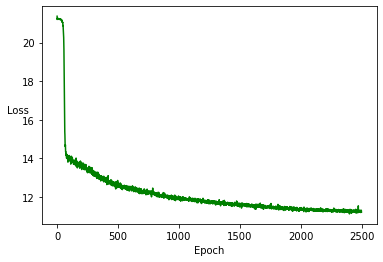

In [80]:
plt.plot(epoch_list, loss_list, c = 'g')
plt.xlabel('Epoch')
plt.ylabel('Loss', rotation = 0)
plt.show()